<details open>
<summary> <b style="font-size:2em;">Employee Burnout Prediction</b></summary>
<br>
Employee burnout is a state of physical, emotional and mental exhaustion caused by excessive and prolonged stress. It can have serious
consequences on an individual's well-being and can lead to decreased productivity and job performance. In today's fast-paced and constantly
connected world, it is increasingly important to recognize and address the signs of burnout in order to maintain the health and well-being of
employees.

we will be exploring the use of regression techniques to predict employee burnout. By analyzing a dataset containing various factors that may
contribute to burnout such as workload, mental fatigue job and work-life balance, we can develop a model to identify individuals who may be at
risk of burnout. By proactively addressing these risk factors, organizations can help prevent burnout and promote the well-being of their
employees.
</details> <hr>

Dataset: Are Your Employees Burning Out?
This dataset consists of 9 columns as follows:
- **Employee ID**: The unique ID allocated for each employee (example: fffe390032003000)
- **Date of Joining**: The date-time when the employee has joined the organization (example: 2008-12-30)
- **Gender**: The gender of the employee (Male/Female)
- **Company Type**: The type of company where the employee is working (Service/Product)
- **WFH Setup Available**: Is the work from home facility available for the employee (Yes/No)
- **Designation**: The designation of the employee of work in the organization. In the range of [0.0, 5.0] bigger is higher designation.
- **Resource Allocation**: The amount of resource allocated to the employee to work, ie. number of working hours. In the range of [1.0, 10.0]
(higher means more resource)
- **Mental Fatigue Score**: The level of fatigue mentally the employee is facing. In the range of [0.0, 10.0] where 0.0 means no fatigue and
10.0 means completely fatigue.
- **Burn Rate**: The value we need to predict for each employee telling the rate of Bur out while working. In the range of [0.0, 1.0] where the
higher the value is more is the burn out.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

data=pd.read_excel("employee_burnout_analysis-AI4.xlsx")

data.head(15)

In [34]:
data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [35]:
data.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [36]:
data.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [37]:
data.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [38]:
data.isnull().sum().sum()

4622

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [40]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [41]:
data.isnull()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
22745,False,False,False,False,False,False,False,True,False
22746,False,False,False,False,False,False,False,False,False
22747,False,False,False,False,False,False,False,True,False
22748,False,False,False,False,False,False,False,False,False


In [42]:
data.corr(numeric_only=True)["Burn Rate"][:-1]

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Name: Burn Rate, dtype: float64

In [ ]:
sns.pairplot(data)
plt.show()

data=data.dropna()

In [45]:
data.head(15)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29
6,fffe33003300340039003100,2008-01-02,Female,Service,No,3,6.0,7.9,0.62
7,fffe32003600320037003400,2008-10-31,Female,Service,Yes,2,4.0,4.4,0.33
10,fffe33003100330032003700,2008-03-16,Male,Product,Yes,2,3.0,5.3,0.50
11,fffe3400310035003800,2008-05-12,Male,Service,Yes,0,1.0,1.8,0.12
14,fffe33003100330036003300,2008-05-14,Male,Product,Yes,1,3.0,5.8,0.51


In [46]:
data.shape

(18590, 9)

In [47]:
data=data.drop('Employee ID',axis=1)

In [48]:
data.head(15)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
5,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29
6,2008-01-02,Female,Service,No,3,6.0,7.9,0.62
7,2008-10-31,Female,Service,Yes,2,4.0,4.4,0.33
10,2008-03-16,Male,Product,Yes,2,3.0,5.3,0.50
11,2008-05-12,Male,Service,Yes,0,1.0,1.8,0.12
14,2008-05-14,Male,Product,Yes,1,3.0,5.8,0.51


Min Data 2008-01-01 00:00:00
Max Data 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired Employees'>

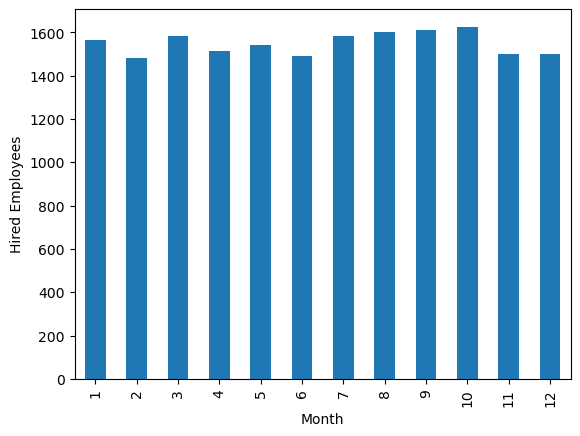

In [49]:
print(f"Min Data {data['Date of Joining'].min()}")
print(f"Max Data {data['Date of Joining'].max()}")
data_month=data.copy()
data_month["Date of Joining"]=data_month["Date of Joining"].astype("datetime64[ns]") #time as nanosec
data_month["Date of Joining"].groupby(data_month["Date of Joining"].dt.month).count().plot(kind="bar",xlabel="Month",ylabel="Hired Employees")

In [50]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
# Specify time unit as nanoseconds when converting to datetime64
data["Days"] = data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18590, dtype: int64

In [51]:
data.head(15)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Days
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16,273
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36,334
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20,307
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52,205
5,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29,330
6,2008-01-02,Female,Service,No,3,6.0,7.9,0.62,1
7,2008-10-31,Female,Service,Yes,2,4.0,4.4,0.33,304
10,2008-03-16,Male,Product,Yes,2,3.0,5.3,0.50,75
11,2008-05-12,Male,Service,Yes,0,1.0,1.8,0.12,132
14,2008-05-14,Male,Product,Yes,1,3.0,5.8,0.51,134


In [52]:
# Select only numeric columns before calculating correlation
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()['Burn Rate']
print(correlation)

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


In [53]:
data.corr(numeric_only=True)['Burn Rate'][:]

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64

In [54]:
data

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Days
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16,273
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36,334
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20,307
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52,205
5,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29,330
...,...,...,...,...,...,...,...,...,...
22743,2008-12-15,Female,Product,Yes,1,3.0,6.0,0.48,349
22744,2008-05-27,Male,Product,No,3,7.0,6.2,0.54,147
22746,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59,18
22748,2008-01-10,Female,Service,No,2,5.0,5.9,0.52,9


In [55]:
data = data.drop(['Date of Joining','Days'], axis = 1)

In [56]:
data

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29
...,...,...,...,...,...,...,...
22743,Female,Product,Yes,1,3.0,6.0,0.48
22744,Male,Product,No,3,7.0,6.2,0.54
22746,Female,Product,Yes,3,6.0,6.7,0.59
22748,Female,Service,No,2,5.0,5.9,0.52


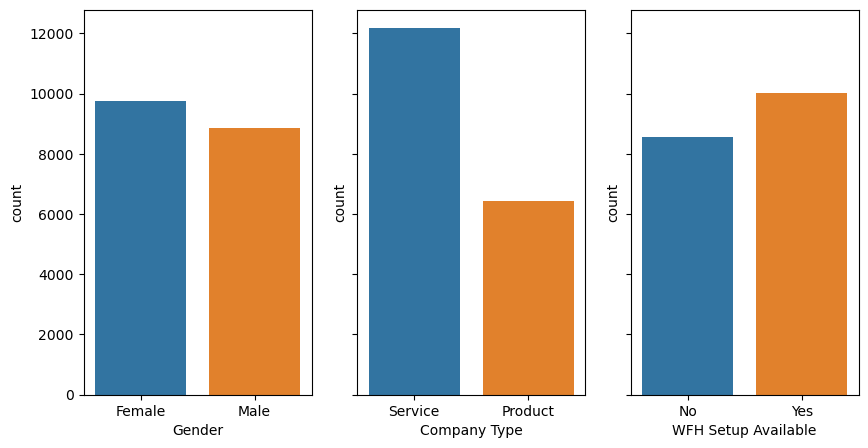

In [57]:
cat_columns = data.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5))
for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=data, ax=ax[i])
plt.show()

In [58]:
# Check if the columns exist before applying get_dummies
if all(col in data.columns for col in ['Company Type', 'WFH Setup Available', 'Gender']):
    data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available','Gender'], drop_first=True)
    data.head()
    encoded_columns = data.columns
else:
    print("Error: One or more of the specified columns are not present in the DataFrame.")
    # Add debugging steps here to investigate why the columns are missing.
    # For example, print the existing columns:
    print(data.columns)



In [59]:
encoded_columns

Index(['Designation', 'Resource Allocation', 'Mental Fatigue Score',
       'Burn Rate', 'Company Type_Service', 'WFH Setup Available_Yes',
       'Gender_Male'],
      dtype='object')

In [60]:
data

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,2,3.0,3.8,0.16,1,0,0
1,1,2.0,5.0,0.36,1,1,1
3,1,1.0,2.6,0.20,1,1,1
4,3,7.0,6.9,0.52,1,0,0
5,2,4.0,3.6,0.29,0,1,1
...,...,...,...,...,...,...,...
22743,1,3.0,6.0,0.48,0,1,0
22744,3,7.0,6.2,0.54,0,0,1
22746,3,6.0,6.7,0.59,0,1,0
22748,2,5.0,5.9,0.52,1,0,0


In [49]:
# Split df into X and y
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)

In [50]:
X

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,2,3.0,3.8,1,0,0
1,1,2.0,5.0,1,1,1
3,1,1.0,2.6,1,1,1
4,3,7.0,6.9,1,0,0
5,2,4.0,3.6,0,1,1
...,...,...,...,...,...,...
22743,1,3.0,6.0,0,1,0
22744,3,7.0,6.2,0,0,1
22746,3,6.0,6.7,0,1,0
22748,2,5.0,5.9,1,0,0


In [51]:
y

0        0.16
1        0.36
3        0.20
4        0.52
5        0.29
         ... 
22743    0.48
22744    0.54
22746    0.59
22748    0.52
22749    0.61
Name: Burn Rate, Length: 18590, dtype: float64

In [52]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns )

In [53]:
X_train

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
8977,0.723327,0.250185,-0.061773,0.724706,-1.082297,1.051505
14115,-0.159330,0.250185,-0.941481,0.724706,-1.082297,-0.951018
8797,0.723327,0.250185,0.973179,0.724706,-1.082297,-0.951018
1173,-1.041987,-1.214568,-0.579248,-1.379869,-1.082297,-0.951018
1941,-0.159330,0.738436,1.180169,-1.379869,0.923961,1.051505
...,...,...,...,...,...,...
13453,0.723327,1.226687,1.645897,-1.379869,0.923961,-0.951018
21179,0.723327,0.250185,-1.044976,0.724706,0.923961,1.051505
6327,0.723327,0.250185,0.093470,0.724706,-1.082297,1.051505
14933,-0.159330,0.250185,0.714441,0.724706,-1.082297,1.051505


In [54]:
import os
import pickle

scaler_filename = './models/scaler.pkl'

# Create the 'models' directory if it doesn't exist
os.makedirs(os.path.dirname(scaler_filename), exist_ok=True)

# Use pickle to save the scaler to the file
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [55]:
X_train

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
8977,0.723327,0.250185,-0.061773,0.724706,-1.082297,1.051505
14115,-0.159330,0.250185,-0.941481,0.724706,-1.082297,-0.951018
8797,0.723327,0.250185,0.973179,0.724706,-1.082297,-0.951018
1173,-1.041987,-1.214568,-0.579248,-1.379869,-1.082297,-0.951018
1941,-0.159330,0.738436,1.180169,-1.379869,0.923961,1.051505
...,...,...,...,...,...,...
13453,0.723327,1.226687,1.645897,-1.379869,0.923961,-0.951018
21179,0.723327,0.250185,-1.044976,0.724706,0.923961,1.051505
6327,0.723327,0.250185,0.093470,0.724706,-1.082297,1.051505
14933,-0.159330,0.250185,0.714441,0.724706,-1.082297,1.051505


In [56]:
y_train

8977     0.41
14115    0.34
8797     0.61
1173     0.35
1941     0.61
         ... 
13453    0.78
21179    0.30
6327     0.42
14933    0.54
288      0.57
Name: Burn Rate, Length: 13013, dtype: float64

In [57]:
import os
import pickle

#saving the processed data
path = './data/processed/'

# Create the directory if it doesn't exist
os.makedirs(path, exist_ok=True)

X_train.to_csv(path + 'X_train_processed.csv', index=False)
y_train.to_csv(path + 'y_train_processed.csv', index=False)

In [58]:
#from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
linear_regression_model = LinearRegression()

# Train the model
linear_regression_model.fit(X_train, y_train)


LinearRegression()

In [59]:
#Linear Regressing Model Performance Metrics

print("Linear Regression Model Performance Metrics:\n")
# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Linear Regression Model Performance Metrics:

Mean Squared Error: 0.003156977911361073
Root Mean Squared Error: 0.056186990588223115
Mean Absolute Error: 0.045950320326447726
R-squared Score: 0.918822674247248


In [60]:
X_test

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
14239,-0.159330,-0.238066,-0.010025,0.724706,0.923961,-0.951018
15056,-1.041987,-0.726317,-1.562452,0.724706,0.923961,-0.951018
12187,1.605983,0.738436,0.507451,-1.379869,0.923961,1.051505
248,0.723327,0.250185,-0.010025,-1.379869,0.923961,-0.951018
12710,-0.159330,0.250185,-0.217015,0.724706,0.923961,1.051505
...,...,...,...,...,...,...
21709,1.605983,0.738436,1.128421,0.724706,-1.082297,-0.951018
2760,-0.159330,0.250185,-0.424005,0.724706,0.923961,-0.951018
20275,-1.041987,-0.726317,-0.165268,0.724706,0.923961,-0.951018
13124,-0.159330,-0.238066,0.869683,0.724706,-1.082297,-0.951018
